# Funzioni Giamma 

Il materiale sotto riportato contiene tutto ciò che ho sviluppato in completa autonomia e, laddove necessario, le porzioni di codice utili a farlo girare correttamente.
Questo file è stato realizzato per tenere traccia di ciò che ho svolto **senza effettuare il _commit_ su Github**.


***


## Preliminaries

### Packages importing

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from matplotlib.patches import Polygon
%matplotlib inline

### Coordinates transformation

In [39]:
#Cell dimensions
XCELL = 42.
ZCELL = 13.

# X coordinates translation
global_x_shifts = [994.2, 947.4,-267.4,-261.5,]

# Z coordinates translations
local_z_shifts = [z*ZCELL for z in range(0,4)]
global_z_shifts = [823.5, 0, 823.5, 0]

## (A) Wire position

### Function to read events
_(identica a quella presente nel file `Analysis_Calibration.ipynb` del branch Bottaro su Github)_

In [40]:
def read_data(event):    
    event_number = int(event[0])
    hits_number  = int(event[1])
    if hits_number == 0:
        hit       = [np.nan]
        chamber   = [np.nan]
        layer     = [np.nan]
        xl_local  = [np.nan]
        xr_local  = [np.nan]
        z_local   = [np.nan]
        time      = [np.nan]
        xl_global = [np.nan]
        xr_global = [np.nan]
        z_global  = [np.nan]
    else:
        hit       = np.arange(hits_number)
        chamber   = np.fromiter((event[2+5*i] for i in range(hits_number)), int)
        layer     = np.fromiter((event[3+5*i] for i in range(hits_number)), int)
        xl_local  = np.fromiter((event[4+5*i] for i in range(hits_number)), float)
        xr_local  = np.fromiter((event[5+5*i] for i in range(hits_number)), float)
        z_local   = np.fromiter((local_z_shifts[i-1]+ZCELL/2 for i in layer), float)
        time      = np.fromiter((event[6+5*i] for i in range(hits_number)), float)
        xl_global = np.fromiter((global_x_shifts[i] for i in chamber), float) - xl_local
        xr_global = np.fromiter((global_x_shifts[i] for i in chamber), float) - xr_local
        z_global  = np.fromiter((global_z_shifts[i] for i in chamber), float) + z_local
        
    dataframe = pd.DataFrame(
        { 'EvNumber' : event_number,
          'Hit'      : hit,
          'Chamber'  : chamber,
          'Layer'    : layer,
          'XL_local' : xl_local,
          'XR_local' : xr_local,
          'Z_local'  : z_local,
          'Time'     : time,
          'XL_global': xl_global,
          'XR_global': xr_global,
          'Z_global' : z_global,
        })

        
    #dataframe.set_index('Hit', inplace=True) # set as index the number of the hit 
    return dataframe, event_number, hits_number

### Function for wire positions

Funzione per posizioni fili locali e globali 

In [41]:
#my specific path
path = '/Users/gianmarcopompeo/Desktop/Final Project (group6)/data_merged/calibration'

In [42]:
x_positions_loc = [] 
z_positions_loc = []
x_positions_glob = [] 
z_positions_glob = []

def wire_positions():
    '''Plot wire positions from averages between
    x_right and x_left, positions of muon hits
    
    Parameters
    ----------
    None

    Returns
    -------
    x_positions_loc  = list with positions of local x
    z_positions_loc  = list with positions of local z
    x_positions_glob = list with positions of global x
    z_positions_glob = list with positions of global z
    '''
    
    #cycle on all files of the folder calibration
    for filename in os.listdir(path):
        file_path = path + '/' + str(filename)
    

        with open(file_path) as f:
            for line in f:
                event = line.split()
                event = [float(i) for i in event]
                #print(event)
                ev, evNumber, hits = read_data(event)

                XL_list_loc = list(ev['XL_local'])
                XR_list_loc = list(ev['XR_local'])
                Z_list_loc  = list(ev['Z_local'])

                XL_list_glob = list(ev['XL_global'])
                XR_list_glob = list(ev['XR_global'])
                Z_list_glob  = list(ev['Z_global'])


                #clean lists from NaN
                XL_list_loc = [x for x in XL_list_loc if ~np.isnan(x)]
                XR_list_loc = [x for x in XR_list_loc if ~np.isnan(x)]
                XL_list_glob = [x for x in XL_list_glob if ~np.isnan(x)]
                XR_list_glob = [x for x in XR_list_glob if ~np.isnan(x)]

                #exclude empty lists - local
                if (len(XL_list_loc)>0 and len(XR_list_loc)>0):
                    for ii in range(len(XL_list_loc)):
                        average=(XL_list_loc[ii]+XR_list_loc[ii])*0.5
                        x_positions_loc.append(average)
                        z_positions_loc.append(Z_list_loc[ii])

                #exclude empty lists - global
                if (len(XL_list_glob)>0 and len(XR_list_glob)>0):
                    for ii in range(len(XL_list_glob)):
                        average=(XL_list_glob[ii]+XR_list_glob[ii])*0.5
                        x_positions_glob.append(average)
                        z_positions_glob.append(Z_list_glob[ii])
                    
    return x_positions_loc, z_positions_loc, x_positions_glob, z_positions_glob

In [43]:
wire_positions()

([252.0,
  231.0,
  252.0,
  231.0,
  231.0,
  231.0,
  252.0,
  252.0,
  210.0,
  189.0,
  210.0,
  189.0,
  168.0,
  147.0,
  147.0,
  672.0,
  21.0,
  21.0,
  21.0,
  21.0,
  42.0,
  336.0,
  336.0,
  315.0,
  294.0,
  315.0,
  315.0,
  294.0,
  231.0,
  231.0,
  252.0,
  252.0,
  189.0,
  189.0,
  168.0,
  168.0,
  168.0,
  168.0,
  147.0,
  126.0,
  126.0,
  104.975,
  105.015,
  189.0,
  189.0,
  210.0,
  210.0,
  147.0,
  147.0,
  168.0,
  168.0,
  210.0,
  126.0,
  147.0,
  210.0,
  126.0,
  189.0,
  189.0,
  147.0,
  147.0,
  126.0,
  126.0,
  168.0,
  147.0,
  168.0,
  147.0,
  147.0,
  147.0,
  168.0,
  168.0,
  105.0,
  105.0,
  126.0,
  126.0,
  399.0,
  399.0,
  378.0,
  420.0,
  273.0,
  273.0,
  294.0,
  294.0,
  63.0,
  63.0,
  83.97999999999999,
  42.0,
  42.0,
  210.0,
  210.0,
  231.0,
  231.0,
  168.0,
  168.0,
  147.0,
  189.0,
  189.0,
  168.0,
  546.0,
  546.0,
  525.0,
  525.0,
  462.0,
  462.0,
  441.0,
  483.0,
  21.0,
  21.0,
  42.0,
  42.0,
  21.0,
  21.0,


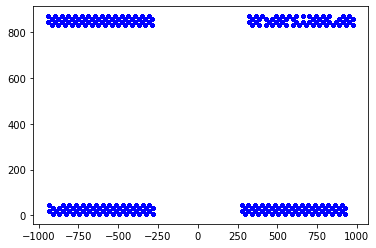

In [44]:
plt.plot(x_positions_glob, z_positions_glob, "b.")

## (B) Integration of the wire feature
Qui sotto la funzione `plot_background` (anch'essa recuperata dallo stesso file di cui sopra) è stata modificata in modo tale da restituire automaticamente anche il plot delle posizioni dei fili in sovrimpressione. Per ottenerli, è naturalmente necessario aver girato la funzione apposita che fornisce i valori di coordinate nelle liste `x_positions` e `z_positions`

In [45]:
def plot_background():
    # create Pandas DataFrame for the cambers positions
    chamber_position = pd.DataFrame({
    'chamber' : [i for i in range(4)],
    'x_vertices' : [(global_x_shifts[i], global_x_shifts[i] - 720, global_x_shifts[i] - 720, global_x_shifts[i])
                    for i in range(4)],
    'y_vertices' : [(global_z_shifts[i], global_z_shifts[i], global_z_shifts[i] + 52, global_z_shifts[i] + 52)
                    for i in range(4)],
    })
    x_lim = [[-1000, 1000], # global detector
             [    0, 1000], # chamber 0
             [    0, 1000], # chamber 1
             [-1000,    0], # chamber 2
             [-1000,    0]] # chamber 3
    y_lim = [[-100, 1000],  # global detector
             [800 ,  900],  # chamber 0
             [ -25,   75],  # chamber 1
             [ 800,  900],  # chamber 2
             [ -25,   75]]  # chamber 3
    title = ["DETECTOR", "Chamber 0", "Chamber 1", "Chamber 2", "Chamber 3"]
    # create pyplot 'Axes' objects
    ax_global = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2)
    ax_0 = plt.subplot2grid(gridsize, (2, 1), colspan=1, rowspan=1) # top-right
    ax_1 = plt.subplot2grid(gridsize, (3, 1), colspan=1, rowspan=1) # bottom-right
    ax_2 = plt.subplot2grid(gridsize, (2, 0), colspan=1, rowspan=1) # top-left
    ax_3 = plt.subplot2grid(gridsize, (3, 0), colspan=1, rowspan=1) # bottom-left
    
    axes = [ax_global, ax_0, ax_1, ax_2, ax_3]
    for index, ax in enumerate(axes):
        ax.set_xlim(x_lim[index])
        ax.set_ylim(y_lim[index])
        ax.set_xlabel("x [mm]")
        ax.set_ylabel("z [mm]")
        ax.plot(x_positions_glob, z_positions_glob, marker=".", ls="", color="gray", markersize=1)
        if index == 0: ax.set_title(title[index])
        else: ax.set_title(title[index], pad=-20)
        # plot the 4 chambers in each 'Axes'
        for j in range(4):
            chamber = chamber_position[chamber_position["chamber"] == j]
            ax.fill(chamber["x_vertices"].values[0], chamber["y_vertices"].values[0], color='gray', fill=False)
    return axes

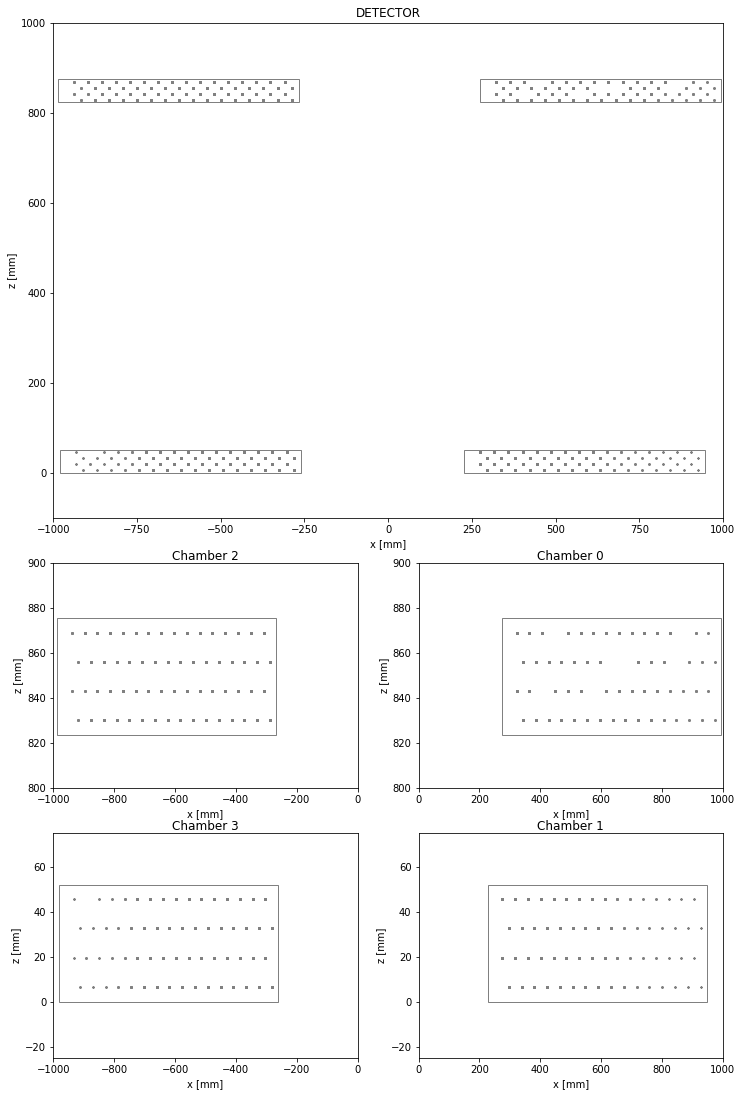

In [46]:
gridsize = (5, 2)
fig = plt.figure(figsize = (12, 24))
axes = plot_background()

plt.show()

## (C) Slope differences local-global

### Function to select events
_(identica a quella presente nel file `Analysis_Calibration.ipynb` del branch Bottaro su Github)_

In [47]:
def select_events(dataframe,hits_number):
        
        if (hits_number < 6 or hits_number > 20):
            select=False
            chambers=[]
            n_layer=[]
            return select, chambers, n_layer 

        else:
            #hits only in the right side
            if((dataframe['Chamber']<=1).all()):
                chambers=[0,1]
                #compute number of different layers in each chamber
                n_layer_ch0 = dataframe[dataframe['Chamber']==0]['Layer'].nunique()
                n_layer_ch1 = dataframe[dataframe['Chamber']==1]['Layer'].nunique()
                
                n_layer=[n_layer_ch0, n_layer_ch1]
                
                #require at least 3 different layers for each chamber
                if(n_layer_ch0>=3 and n_layer_ch1>=3):
                    select=True
                    return select, chambers, n_layer
                else:
                    select=False
                    return select, chambers, n_layer
                
            #hits only in the left side
            elif((dataframe['Chamber']>=2).all()):
                chambers=[2,3]
                #compute number of different layers in each chamber
                n_layer_ch2 = dataframe[dataframe['Chamber']==2]['Layer'].nunique()
                n_layer_ch3 = dataframe[dataframe['Chamber']==3]['Layer'].nunique() 
                
                n_layer=[n_layer_ch2, n_layer_ch3]
                
                #require at least 3 different layers for each chamber
                if(n_layer_ch2>=3 and n_layer_ch3>=3):
                    select=True
                    return select, chambers, n_layer
                else:
                    select=False
                    return select, chambers, n_layer
            
            #hits in both left and right side
            else:
                select=False
                chambers=[]
                n_layer=[]
                return select, chambers, n_layer

### Functions to fit
_(identiche a quelle presenti nel file `Analysis_Calibration.ipynb` del branch Bottaro su Github)_

In [55]:
###############
### LOCAL
###############
import random
from scipy import stats

def local_fit(dataframe, list_chambers, list_layers, exclusion_layer=0):
    #list to store results for each chamber
    results=[]
    #loop over the (two) chambers
    for i in range(0,len(list_chambers)):
       #if we have 4 different layers we randomly select a layer to be excluded
       #we will use the point from the excluded layer to check the goodness of the global fit
        if(list_layers[i]==4 and exclusion_layer==1):
            rand_layer=random.randint(1,4)
        else:
            rand_layer=0 #layers are 1,2,3,4: excluding layer 0 is equivalent to keeping them all
        
        #create dataframe_cl filtered by chamber and excluded layer
        dataframe_c = dataframe[dataframe['Chamber']==list_chambers[i]] #dataframe filtered by chamber
        dataframe_cl = dataframe_c[dataframe_c['Layer']!=rand_layer]    #filtered by chamber and excluded layer
        
        # Z local coordinates corresponding to the 4 different layers
        Z=[6.5, 19.5, 32.5, 45.5]
        
        #create a list l containing lists of points (z,x), one for each selected layer
        l=[]
        
        #loop over selected layers and fill l
        for layer_index in dataframe_cl['Layer'].unique():
            XR=np.array(dataframe_cl[dataframe_cl['Layer']==layer_index]['XR_local'])
            XL=np.array(dataframe_cl[dataframe_cl['Layer']==layer_index]['XL_local'])
            
            z=Z[(layer_index-1)] #layer_index is in range [1,4], list index must be in range [0,3]
            l_temp=[]
            
            for x in XR:
                l_temp.append((z,x))
            for x in XL:
                l_temp.append((z,x)) 
            l.append(l_temp) 
            
        #create numpy array with all possible combinations of 3 (4) points p1,p2,p3(,p4)
        if(list_layers[i]==3 or exclusion_layer==1):
            combinations=np.array([(p1,p2,p3) for p1 in l[0] for p2 in l[1] for p3 in l[2]]) 
        elif(list_layers[i]==4 and exclusion_layer==0):
            combinations=np.array([(p1,p2,p3,p4) for p1 in l[0] for p2 in l[1] for p3 in l[2] for p4 in l[3]])
        else:
            print("ERROR, Unexpected number of layers")
            break   
            
        
        #interpolate each combination and select the combination with least chi squared
        min_chisq=100000 #to store minimum chisq
        if(list_layers[i]==3 or exclusion_layer==1):
            optimal_comb=np.zeros((3,2)) #to store best combination of points
        if(list_layers[i]==4 and exclusion_layer==0):
            optimal_comb=np.zeros((4,2)) #to store best combination of points    
        slope_opt=0 #to store slope obtained with the best combination
        intercept_opt=0 #to store intercept obtained with the best combination
        for points in combinations:
            #linear regression
            slope, intercept, r_value, p_value, std_err=stats.linregress(points[:,0],points[:,1])
            #compute expected x using the interpolating function
            expect_x=intercept+slope*(points[:,0])
            #compute chi squared
            chisq, p_value=stats.chisquare(points[:,1],expect_x)
            #eventually update min_chisq and optimal_comb
            if(chisq<min_chisq):
                min_chisq=chisq
                optimal_comb=points
                slope_opt=slope
                intercept_opt=intercept
            else:
                continue
                  
        
        #add to results: results is a list of 2 dictionaries, one for each chamber       
        results.append({"slope":slope_opt, 
                        "intercept":intercept_opt, 
                        "optimal_comb": optimal_comb, 
                        "excl_layer": rand_layer})
                   
    return results



###############
### GLOBAL
###############
from math import fabs

def global_fit(dataframe, list_chambers, lfit_results):
    
    #TRANSFORM LOCAL COORDINATES IN GLOBAL COORDINATES
    
    #First chamber:
    global_z_ch1 = global_z_shifts[list_chambers[0]]+lfit_results[0]["optimal_comb"][:,0]
    global_x_ch1 = global_x_shifts[list_chambers[0]]-lfit_results[0]["optimal_comb"][:,1]
    global_ch1=np.column_stack((global_z_ch1, global_x_ch1))
    
    #Second chamber:
    global_z_ch2 = global_z_shifts[list_chambers[1]]+lfit_results[1]["optimal_comb"][:,0]
    global_x_ch2 = global_x_shifts[list_chambers[1]]-lfit_results[1]["optimal_comb"][:,1]
    global_ch2=np.column_stack((global_z_ch2, global_x_ch2))
    
    points=np.concatenate((global_ch1, global_ch2))
    #print(points)
    #LINEAR REGRESSION
    slope, intercept, r_value, p_value, std_err=stats.linregress(points[:,0],points[:,1])
    
    #compute expected x using the interpolating function
    expect_x=intercept+slope*(points[:,0])
        
    #COMPUTE RESIDUALS USING TEST LAYER (layer excluded in local fit function)
    # Z local coordinates corresponding to the 4 different layers
    Z_local=[6.5,19.5, 32.5, 45.5]
    #list to store residuals
    res=[]
    #compute residuals for each chamber
    for c in range(0,len(list_chambers)):
        dataframe_c = dataframe[dataframe['Chamber']==list_chambers[c]] #dataframe filtered by chamber
        res_temp=[]
        excl_layer=lfit_results[c]["excl_layer"]
        #test layer Z global coordinate 
        Z_test_layer=global_z_shifts[c]+Z_local[(excl_layer-1)]
        #if there were only 3 layers, excl_layer was set to 0:
        if(excl_layer!=0): 
            expect_x=intercept+slope*(Z_test_layer)
            XR=np.array(dataframe_c[dataframe_c['Layer']==excl_layer]['XR_global'])
            XL=np.array(dataframe_c[dataframe_c['Layer']==excl_layer]['XL_global'])
            for i in range(0,XR.size):
                res_temp.append(XR[i]-expect_x)
            for i in range(0,XL.size):
                res_temp.append(XL[i]-expect_x)
                
            res_temp.sort(key=fabs) #we want the smallest residual in absolute value
            res.append(res_temp[0])
        else:
            res=[]
    #convert list res in numpy array  
    res=np.array(res) 
    #plt.plot(points[:,0],points[:,1], 'o')
    #plt.plot(points[:,0],intercept+slope*points[:,0], 'r')
    #plt.show()
    return {"slope": slope, "intercept": intercept, "residuals": res }

### Function to compute histograms of slope residuals
Questa funzione calcola, per una singola run di calibrazione, le differenze tra la pendenza ottenuta dal fit globale con quelle ottenute dai fit locali per ogni evento, camera per camera. Tali differenze vengono poi rappresentate in istogrammi.

La funzione è pensata per restituire risultati per ogni run, quindi è necessario passare in input il nome del file relativo alla run stessa - naturalmente come stringa.

In [64]:
#given the output of local_fit and global_fit funcs
#(both dictionaries), this function computes the 
#difference between the two slopes (global-local)

def chamber_hist(filename):
    '''Read calibration run and create histograms of differences
    between local and global fit slopes, for each chamber
    
    Parameters
    ----------
    filename : name of the file

    Returns
    -------
    It prints the 4 per-chamber histograms
    '''
    
    #this will need to be changed
    path = '/Users/gianmarcopompeo/Desktop/Final Project (group6)/data_merged/calibration'
    filepath = path + '/' + str(filename)
    
    #(a) computation of the differences
    with open(filepath) as f:
        
        delta_ch0 = []
        delta_ch1 = []
        delta_ch2 = []
        delta_ch3 = []      
        for line in f:
            event = line.split()
            event = [float(i) for i in event]

            #the event is read and selected
            ev, evNumber, hits = read_data(event)
            condition, chambers, n_layers= select_events(ev,hits)
            if(condition==True):
                lf_results=local_fit(ev, chambers, n_layers,exclusion_layer=1)
                gf_results=global_fit(ev, chambers, lf_results)

                if((ev['Chamber']<=1).all()):
                    delta0 = gf_results["slope"]-lf_results[0]["slope"]
                    delta_ch0.append(delta0)
                    delta1 = gf_results["slope"]-lf_results[1]["slope"]
                    delta_ch1.append(delta1)

                else:
                    delta2 = gf_results["slope"]-lf_results[0]["slope"]
                    delta_ch2.append(delta2)
                    delta3 = gf_results["slope"]-lf_results[1]["slope"]
                delta_ch3.append(delta3)
                        
    #(b) creation of the histograms
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
    
    #we use the same order in which the chambers
    #are built for visualization purposes
    #Chamber 0
    ax=axes[0,1]
    ax.hist(delta_ch0,bins=200, edgecolor='black', linewidth=1.2) #I use the same settings
                                                                 #Botta used, but maybe they
                                                                 #can be improved
    ax.set_title('Chamber 0')
    ax.set_xlabel('slope(global) - slope(local)')
    ax.set_ylabel('Occurences')
    ax.set_xlim([-2, 2])
    
    #Chamber 1
    ax=axes[1,1]
    ax.hist(delta_ch1,bins=50, edgecolor='black', linewidth=1.2) 
    ax.set_title('Chamber 1')
    ax.set_xlabel('slope(global) - slope(local)')
    ax.set_ylabel('Occurences')
    ax.set_xlim([-2, 2])
    
    #Chamber 2
    ax=axes[0,0]
    ax.hist(delta_ch2,bins=200, edgecolor='black', linewidth=1.2) 
    ax.set_title('Chamber 2')
    ax.set_xlabel('slope(global) - slope(local)')
    ax.set_ylabel('Occurences')
    ax.set_xlim([-1, 1])
    
    #Chamber 3
    ax=axes[1,0]
    ax.hist(delta_ch3,bins=200, edgecolor='black', linewidth=1.2) 
    ax.set_title('Chamber 3')
    ax.set_xlabel('slope(global) - slope(local)')
    ax.set_ylabel('Occurences')
    ax.set_xlim([-1, 1])
    
    plt.show()
    
    
    #return delta_ch0, delta_ch1, delta_ch2, delta_ch3 

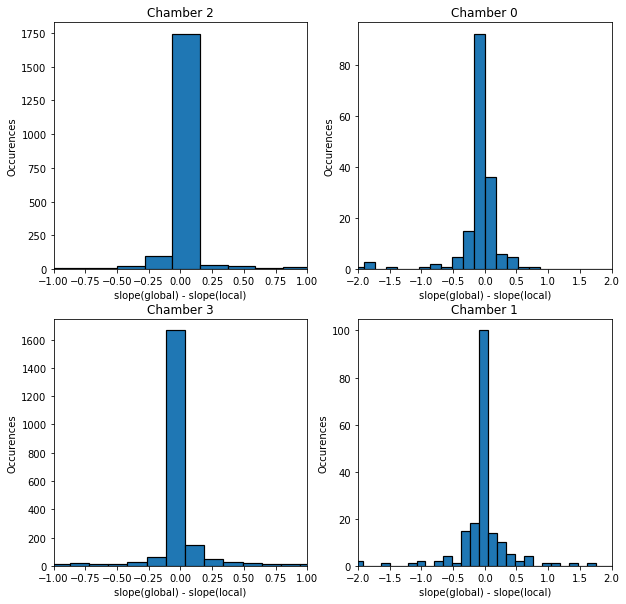

In [65]:
chamber_hist("Run000260.txt")

### Possibile problema
Ha senso che le impostazioni di hist siano definite all'interno della funzione? Binning e range potrebbero cambiare da run a run 

# EXTRA

In [ ]:
x_positions = [] 
z_positions = []

def wire_positions():
    x_positions_loc = [] 
    z_positions_loc = []
    x_positions_glob = [] 
    z_positions_glob = []

    file_path = '/Users/gianmarcopompeo/Desktop/Final Project (group6)/data_merged/calibration/Run000261.txt'#here to select if one wants local or global
    #wire positions
    local= False

    with open(file_path) as f:
        for line in f:
            event = line.split()
            event = [float(i) for i in event]
            #print(event)
            ev, evNumber, hits = read_data(event)

            if (local):
                XL_list = list(ev['XL_local'])
                XR_list = list(ev['XR_local'])
                Z_list  = list(ev['Z_local'])
            else:
                XL_list = list(ev['XL_global'])
                XR_list = list(ev['XR_global'])
                Z_list  = list(ev['Z_global'])


            #clean lists from NaN
            XL_list = [x for x in XL_list if ~np.isnan(x)]
            XR_list = [x for x in XR_list if ~np.isnan(x)]

            #exclude empty lists 
            if (len(XL_list)>0 and len(XR_list)>0):
                for ii in range(len(XL_list)):
                    average=(XL_list[ii]+XR_list[ii])*0.5
                    x_positions.append(average)
                    z_positions.append(Z_list[ii])

    #print(len(x_positions), len(z_positions))
    
#return x_positions_loc, z_positions_loc, x_positions_glob, z_positions_glob